In [15]:
from google.colab import files
upladed=files.upload()

Saving train.csv to train.csv


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
# Step 2: Load the dataset
data = pd.read_csv("train.csv")
# Step 3: Check for missing values
missing_values = data.isnull().sum()
# Step 4: Drop rows with missing "parental level of education"
# Missing values typically occur in the Column [parental level of education]
cleaned_data = data.dropna (subset=["Age","Fare","Embarked"])
# Step 5: Drop duplicate rows if there any
cleaned_data = cleaned_data.drop_duplicates()
# Step 6: Final check after cleaning
final_missing = cleaned_data.isnull().sum()
final_shape = cleaned_data.shape
print("Final Missing Values:")
print(final_missing)
print("\nFinal Shape of cleaned Data:")
print(final_shape)

Final Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Final Shape of cleaned Data:
(712, 10)


In [26]:
# Question 1
# Mean ,Min and Max  of Age, Fare, SibSp, and Parch
age_avg = cleaned_data["Age"].mean()
age_min=cleaned_data["Age"].min()
age_max = cleaned_data["Age"].max()
fare_avg = cleaned_data["Fare"].mean()
fare_min=cleaned_data["Fare"].min()
fare_max = cleaned_data["Fare"].max()
SibSp_avg = cleaned_data["SibSp"].mean()
SibSp_min=cleaned_data["SibSp"].min()
SibSp_max = cleaned_data["SibSp"].max()
parch_avg = cleaned_data["Parch"].mean()
parch_min=cleaned_data["Parch"].min()
parch_max = cleaned_data["Parch"].max()
print(f"Age  - Mean: {age_avg}")
print(f"Age  - Min: {age_min}")
print(f"Age  - Max: {age_max}")
print(f"Fare  - Mean: {fare_min}")
print(f"Fare  - Min: {fare_min}")
print(f"Fare  - Max: {fare_min}")
print(f"SibSp  - Mean: {SibSp_avg}")
print(f"SibSp  - Min: {SibSp_min}")
print(f"SibSp  - Max: {SibSp_max}")
print(f"Parch  - Mean: {SibSp_avg}")
print(f"Parch  - Min: {SibSp_min}")
print(f"Parch  - Max: {SibSp_max}")
print("----------------------------------------------------------------------")

Age  - Mean: 29.64209269662921
Age  - Min: 0.42
Age  - Max: 80.0
Fare  - Mean: 0.0
Fare  - Min: 0.0
Fare  - Max: 0.0
SibSp  - Mean: 0.5140449438202247
SibSp  - Min: 0
SibSp  - Max: 5
Parch  - Mean: 0.5140449438202247
Parch  - Min: 0
Parch  - Max: 5
------------------------------------------------------------------------------


In [44]:
# Question 2
# Survivors vs non-survivors among passengers under 18 in 3rd class
under_18 = cleaned_data[(cleaned_data['Age']<18) & (cleaned_data['Pclass'] ==3 )]
print(f"\nThe number of passenger which are under 18:\n {under_18['Survived'].value_counts()}")
print("------------------------------------------------------------------------------")



The number of passenger which are under 18:
 Survived
0    49
1    29
Name: count, dtype: int64
------------------------------------------------------------------------------


In [33]:
# Question 3
# Survival rate of female passengers in 1st class
female_rt = cleaned_data[(cleaned_data['Sex']=='female') & (cleaned_data['Pclass']==1)]
female_rt = female_rt['Survived'].mean() * 100
print(f"Survival rate of females in 1st class = {female_rt}%")
print("------------------------------------------------------------------------------")

Survival rate of females in 1st class = 96.3855421686747%
------------------------------------------------------------------------------


In [32]:
# Question 4
# Average Fare and Age by Embarkation port
group_age = cleaned_data.groupby('Embarked')['Age'].mean()
group_fare = cleaned_data.groupby('Embarked')['Fare'].mean()
print("Avg Age by Embarked")
print(group_age)
print("Avg Fare by Embarked")
print(group_fare)
print("------------------------------------------------------------------------------")

Avg Age by Embarked
Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64
Avg Fare by Embarked
Embarked
C    68.296767
Q    18.265775
S    27.476284
Name: Fare, dtype: float64
------------------------------------------------------------------------------


In [28]:
# Question 5
# Top 10 fare-paying passengers
top_fare = cleaned_data.sort_values(by='Fare', ascending=False).head(10)
print("Top 10 fare-paying passengers")
print(top_fare[['Name','Fare']])
print("------------------------------------------------------------------------------")

Top 10 fare-paying passengers
                                                Name      Fare
258                                 Ward, Miss. Anna  512.3292
737                           Lesurer, Mr. Gustave J  512.3292
679               Cardeza, Mr. Thomas Drake Martinez  512.3292
88                        Fortune, Miss. Mabel Helen  263.0000
438                                Fortune, Mr. Mark  263.0000
27                    Fortune, Mr. Charles Alexander  263.0000
341                   Fortune, Miss. Alice Elizabeth  263.0000
742            Ryerson, Miss. Susan Parker "Suzette"  262.3750
311                       Ryerson, Miss. Emily Borie  262.3750
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  247.5208
------------------------------------------------------------------------------


In [36]:
# Question 6
# For each Pclass, count travelers with FamilySize > 4, sorted descending
# Create FamilySize column
cleaned_data['FamilySize'] = cleaned_data['SibSp'] + cleaned_data['Parch'] + 1
familly_size = cleaned_data[cleaned_data['FamilySize'] > 4]
counts_by_class = familly_size['Pclass'].value_counts().sort_values(ascending=False)
print("Pclass sorted by count of FamilySize>4:")
print(counts_by_class)
("------------------------------------------------------------------------------")

Pclass sorted by count of FamilySize>4
Pclass
3    43
1     6
2     2
Name: count, dtype: int64
--------------------------------------------------


In [45]:
# Question 7
# Top 10 oldest survivors
old_survivor = cleaned_data[cleaned_data['Survived']==1].sort_values(by='Age', ascending=False).head(10)
print("Top 10 oldest survivors:")
print(old_survivor[['Name','Age']])
("------------------------------------------------------------------------------")

Top 10 oldest survivors:
                                                 Name   Age
630              Barkworth, Mr. Algernon Henry Wilson  80.0
483                            Turkula, Mrs. (Hedwig)  63.0
275                 Andrews, Miss. Kornelia Theodosia  63.0
570                                Harris, Mr. George  62.0
587                  Frolicher-Stehli, Mr. Maxmillian  60.0
366  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  60.0
195                              Lurette, Miss. Elise  58.0
268     Graham, Mrs. William Thompson (Edith Junkins)  58.0
11                           Bonnell, Miss. Elizabeth  58.0
879     Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0


'------------------------------------------------------------------------------'

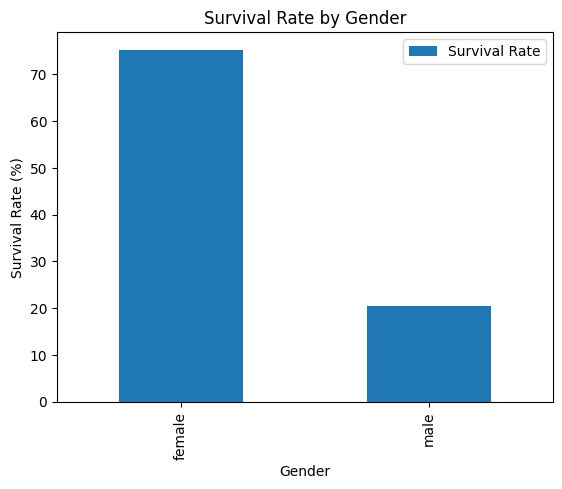

'------------------------------------------------------------------------------'

In [50]:
# Question 8
# Bar chart of survival rate by gender
surv_by_gender = cleaned_data.groupby('Sex')['Survived'].mean() * 100
plt.figure()
surv_by_gender.plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.legend(['Survival Rate'])
plt.show()
("------------------------------------------------------------------------------")

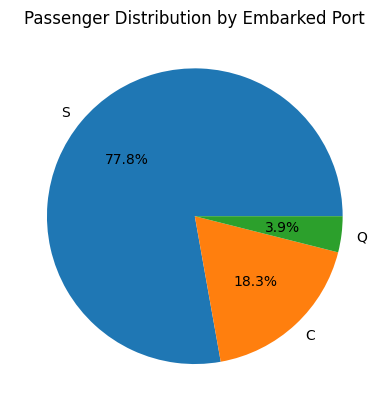

In [48]:
# Question 9
# Pie chart of passenger distribution by embarkation port
embark_cnt = cleaned_data['Embarked'].value_counts()
plt.figure()
embark_cnt.plot(kind='pie', autopct='%1.1f%%')
plt.title('Passenger Distribution by Embarked Port')
plt.ylabel('')
plt.show()
("------------------------------------------------------------------------------")

/tmp/ipython-input-61-2526465884.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_band = cleaned_data.groupby('FareBand')['Survived'].mean() * 100


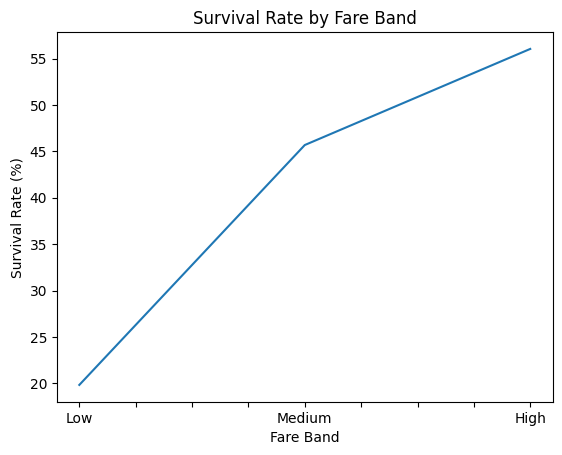

'------------------------------------------------------------------------------'

In [61]:
# Question 10
# survival rate by Fare band
cleaned_data['FareBand'] = pd.qcut(cleaned_data['Fare'], 3, labels=['Low','Medium','High'])
surv_by_band = cleaned_data.groupby('FareBand')['Survived'].mean() * 100
plt.figure()
surv_by_band.plot()
plt.title('Survival Rate by Fare Band')
plt.xlabel('Fare Band')
plt.ylabel('Survival Rate (%)')
plt.show()
("------------------------------------------------------------------------------")